In [14]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [15]:
data = pd.read_csv("book_reviews_sample.csv")

In [16]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [17]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [18]:
#  Take the review remove punctuations

In [19]:
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x['reviewText'].lower() ), axis =1 )

In [20]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [21]:
# now lets do rule based sentiment analysis using vader

In [22]:
vader_sentiment = SentimentIntensityAnalyzer()

In [23]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda x : vader_sentiment.polarity_scores(x)['compound'])
                                                            

In [24]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [25]:
# Organize the sentiments, label and plot them
bins =[ -1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

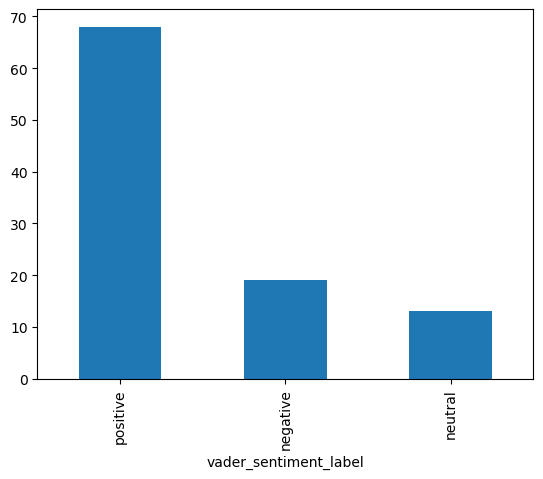

In [26]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [27]:
transformer_pipeline = pipeline("sentiment-analysis", model = "finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [52]:
# get labels for each of rows in dataset, create a sentiment list, go through each review, run the piepline, pull the positive or negative 
# and append it

transformer_labels = []

# for each review, run the transformer model over the review. then pull out the label from the response and append it to the list of the
# transformer labels
for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)
    
    

In [53]:
data['transformer_sentiment_labels'] = transformer_labels

<Axes: xlabel='transformer_sentiment_labels'>

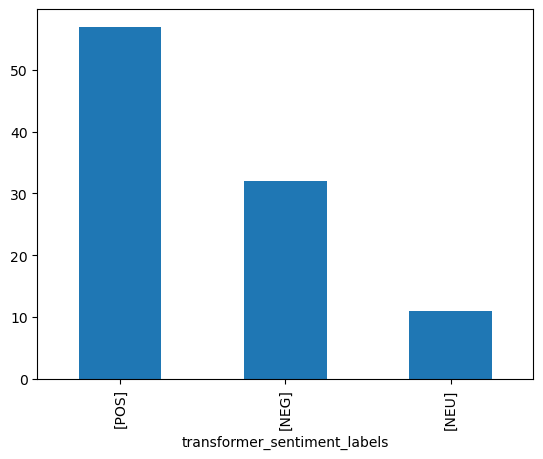

In [60]:
data['transformer_sentiment_labels'].value_counts().plot.bar()